# HW03
Deep Learning, GIST RT5101-01, 2024, Spring, (Tue/Thurs 2:30~3:45)
***

### Problem1. Build cat and dog detection dataset code
(Download URL: https://www.kaggle.com/datasets/andrewmvd/dog-and-cat-detection)
- Build detection dataset code
- Check your dataset code
----

### Problem2. Train cat and dog detection data using FasterRCNN
- Training detection dataset
- Check the result
- Analysis your result

***
### You can add additional code for checking your image and model.
### You must summit ``.ipynb`` file. Do not summit ``.py`` file.
---

### How to submit your homework
Submit your jupyter notebook file with the filename of  *HW03_studentnumber.ipynb*  on GIST LMS

Ex) HW03_20222015.ipynb  

### Submission deadline
2024.06.16, Sunday 23:59 (PM)

### Plagiarism
We encourage you to discuss this homework with your friends or TA, but you should write your own code.




***
***

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem 1. (total 5 pt.)
**Build cat and dog detection dataset code**

- **1**. Build dataset code
- **2**. Split into train dataset and test dataset.
- **3**. Check your dataset code

### Problem 1-1. (2 pt.)
Build dataset code

In [ ]:
import os
from bs4 import BeautifulSoup

# This is a reference code for reading an XML file.
# Utilize this code to read an annotation file to extract bbox information.

def read_ann(directory):
    annotations = os.listdir(directory)

    records = []
    for annot_file in annotations:
        with open(os.path.join(directory,annot_file), 'r') as f:
            file = f.read()

        data = BeautifulSoup(file, "xml")

        objects = data.find_all('object')
        length = len(objects)
        filename = data.find("filename").text
        # img_width = int(data.find('size').width.text)
        # img_height = int(data.find('size').height.text)

        for i in range(length):
            class_name = data.find_all('object')[i].find('name').text
            xmin = int(data.find_all('object')[i].find('bndbox').find('xmin').text)#/img_width
            ymin = int(data.find_all('object')[i].find('bndbox').find('ymin').text)#/img_height
            xmax = int(data.find_all('object')[i].find('bndbox').find('xmax').text)#/img_width
            ymax = int(data.find_all('object')[i].find('bndbox').find('ymax').text)#/img_height

            records.append([filename,class_name,xmin,ymin,xmax,ymax])
    return records

In [ ]:

import os
import numpy as np
import torch
from PIL import Image

class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms

        self.imgs = # image file name list.

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

### Problem 1-2. (2 pt.)
Split into train dataset and test dataset.


In [ ]:
batch_size =32

In [ ]:
import sys
### Change to your own path
sys.path.append('/content/drive/MyDrive/2024_deep_learning/coding_lecture/04.04.CodingLecture05/vis_utils')

import transforms as T

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))
# used for padding variable-length batches.
# "*" = splat operator : unpacking a list into arguments

In [ ]:
def get_transform():
  transforms = T.Compose([
      T.ToTensor(),
  ])

  return transforms

In [ ]:
data_loader =
data_loader_test =

In [ ]:
# Check dataset loader's return
for i, (img, target) in enumerate(data_loader):
  for j in range(batch_size):
    print('SIze of image : (C, H, W) ',img[j].shape)
    print('Number of the objects :', len(target[j]['boxes']))
  if i> 3:
    break

### Problem 1-3. (1 pt.)
Check your dataset code

In [ ]:
# visualize train image

In [ ]:
# visualize train image's bbox

---
---

## Problem 2. (Total 5 pt.)
- **Train Dogs and Cats data using FasterRCNN**


### Problem 2-1. (3 pt.)
- **Step 1**. Import package.
- **Step 2**. Build your FasterRCNN model.
- **Step 3**. Define hyper-parameter for training
- **Step 4**. Train the model and check the validation results  

In [ ]:
''' Step 1 '''
# Import package.

In [ ]:
import sys
### Change to your own path
sys.path.append('/content/drive/MyDrive/2024_deep_learning/coding_lecture/04.04.CodingLecture05/vis_utils')

import utils
from engine import *
from coco_eval import CocoEvaluator
from coco_utils import get_coco_api_from_dataset

In [ ]:
''' Step 2 '''
# Build your FasterRCNN model.

model =

# change classififer class size


In [ ]:
''' Step 3 '''
# Define hyper-parameter for training.

params =

optimizer =

lr_scheduler =

num_epochs =

In [ ]:
''' Step 4 '''
# Train the model and check the validation results

In [ ]:
# define model training function

In [ ]:
# model training
for epoch in range(num_epochs):

In [ ]:
# define model evaluate function

In [ ]:
# run evaluate code

### Problem 2-2. (2 pt.)
Analysis your result

In [ ]:
import cv2
def overlay_instances(img, prediction, threshold=0.8):
    label_dict = {0: 'cat', 1: 'dog'}
    ori_img = img.mul(255).permute(1,2,0).byte().numpy() # Tensor * 255, Convert RGB -> BGR, Tensor to numpy
    for idx in range(len(prediction[0]['boxes'])):
        score = prediction[0]['scores'][idx].cpu().detach().numpy().item() # detach() : Generation of tensors that do not propagate gradients from existing sensors
        if score < threshold:
            continue
        box = x1,y1,x2,y2 = prediction[0]['boxes'][idx].cpu().detach().numpy()
        label = prediction[0]['labels'][idx].cpu().detach().numpy().item()
        print(x1,y1, x2, y2)
        cv2.rectangle(ori_img, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 2)
        cv2.rectangle(ori_img, (int(x1), int(y1)), (int(x1+60), int(y1+20)), (255,0,0),-1)
        cv2.putText(ori_img, label_dict[label], (int(x1), int(y1+15)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), thickness=1)
    return Image.fromarray(ori_img)

In [ ]:
# Inference on test images

#### Your Anwser :

In [11]:
# lxml이 설치되어 있는지 확인합니다
try:
    import lxml
    print("lxml is installed.")
except ImportError:
    print("lxml is not installed.")

# BeautifulSoup 코드 실행
from bs4 import BeautifulSoup

def read_ann(directory):
    annotations = os.listdir(directory)
    records = []
    
    for annot_file in annotations:
        with open(os.path.join(directory, annot_file), 'r') as f:
            file = f.read()
        data = BeautifulSoup(file, "lxml")  # lxml을 사용하도록 설정
        objects


lxml is installed.


In [1]:
import os
from bs4 import BeautifulSoup

def read_ann(directory):
    annotations = os.listdir(directory)
    records = []
    
    for annot_file in annotations:
        with open(os.path.join(directory, annot_file), 'r') as f:
            file = f.read()
        data = BeautifulSoup(file, "lxml")
        objects = data.find_all('object')
        filename = data.find("filename").text
        
        for obj in objects:
            class_name = obj.find('name').text
            xmin = int(obj.find('bndbox').xmin.text)
            ymin = int(obj.find('bndbox').ymin.text)
            xmax = int(obj.find('bndbox').xmax.text)
            ymax = int(obj.find('bndbox').ymax.text)
            records.append([filename, class_name, xmin, ymin, xmax, ymax])
    
    return records

# 예시 사용법
annotations_dir = './data/annotations'  # 실제 annotations 폴더 경로
records = read_ann(annotations_dir)
print(records)


[['Cats_Test0.png', 'cat', 83, 29, 197, 142], ['Cats_Test1.png', 'dog', 128, 22, 240, 222], ['Cats_Test10.png', 'dog', 157, 56, 264, 116], ['Cats_Test100.png', 'cat', 142, 145, 206, 209], ['Cats_Test1000.png', 'cat', 36, 14, 289, 312], ['Cats_Test1001.png', 'dog', 140, 80, 229, 152], ['Cats_Test1002.png', 'cat', 178, 107, 294, 223], ['Cats_Test1003.png', 'dog', 148, 39, 355, 244], ['Cats_Test1004.png', 'dog', 53, 27, 239, 121], ['Cats_Test1005.png', 'cat', 65, 16, 294, 221], ['Cats_Test1006.png', 'dog', 95, 20, 299, 290], ['Cats_Test1007.png', 'cat', 225, 52, 381, 195], ['Cats_Test1008.png', 'cat', 108, 149, 199, 229], ['Cats_Test1009.png', 'dog', 70, 48, 168, 120], ['Cats_Test101.png', 'cat', 134, 79, 297, 234], ['Cats_Test1010.png', 'cat', 36, 65, 137, 172], ['Cats_Test1011.png', 'cat', 112, 64, 217, 164], ['Cats_Test1012.png', 'dog', 94, 36, 378, 263], ['Cats_Test1013.png', 'dog', 130, 38, 237, 132], ['Cats_Test1014.png', 'cat', 195, 61, 374, 177], ['Cats_Test1015.png', 'dog', 94, 3

In [3]:
import torch
from PIL import Image

class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, root, annotations, transforms=None):
        self.root = root
        self.transforms = transforms
        self.annotations = annotations
        self.imgs = sorted(os.listdir(os.path.join(root, './data/images')))
        
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.root, './data/images', self.imgs[idx])
        img = Image.open(img_path).convert("RGB")
        
        annots = [annot for annot in self.annotations if annot[0] == self.imgs[idx]]
        boxes = []
        labels = []
        for annot in annots:
            xmin, ymin, xmax, ymax = annot[2], annot[3], annot[4], annot[5]
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(1 if annot[1] == 'dog' else 0)
        
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        iscrowd = torch.zeros((len(boxes),), dtype=torch.int64)
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        
        if self.transforms is not None:
            img, target = self.transforms(img, target)
        
        return img, target

# 예시 사용법
dataset_dir = '.'  # 실제 dataset 폴더 경로 (현재 작업 디렉토리)
annotations_dir = './data/annotations'
annotations = read_ann(annotations_dir)
dataset = CatDogDataset(root=dataset_dir, annotations=annotations)

# 학습 및 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

train_indices, test_indices = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_dataset = torch.utils.data.Subset(dataset, train_indices)
test_dataset = torch.utils.data.Subset(dataset, test_indices)


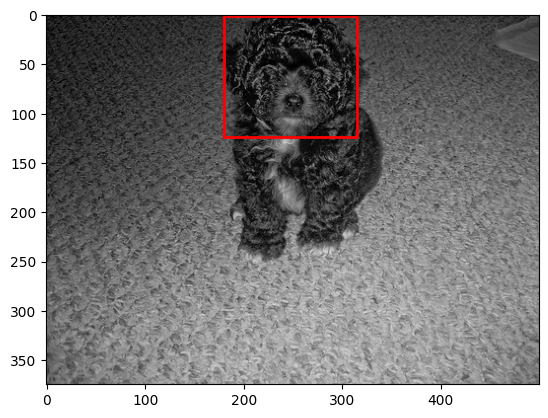

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_sample(img, target):
    img = np.array(img)
    plt.imshow(img)
    for box in target['boxes']:
        xmin, ymin, xmax, ymax = box
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='red', linewidth=2))
    plt.show()

# 예시 사용법
img, target = train_dataset[0]
visualize_sample(img, target)


Faster RNN

In [5]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# 모델 빌드
def get_model_instance_segmentation(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

num_classes = 3  # 배경, 고양이, 개
model = get_model_instance_segmentation(num_classes)

c:\Users\yohan\anaconda3\envs\DL\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\yohan\anaconda3\envs\DL\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\yohan/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:35<00:00, 4.71MB/s] 


In [6]:
import torch.optim as optim
from torch.utils.data import DataLoader

def get_transform():
    return T.Compose([T.ToTensor()])

data_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
data_loader_test = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    i = 0
    for imgs, targets in data_loader:
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets)
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        if i % 10 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{i}/{len(data_loader)}], Loss: {losses.item():.4f}')
        i += 1
    lr_scheduler.step()

    # 평가
    model.eval()
    with torch.no_grad():
        for imgs, targets in data_loader_test:
            imgs = list(img.to(device) for img in imgs)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            model(imgs, targets)
            # 평가 로직 추가


AttributeError: 'Image' object has no attribute 'to'

In [ ]:
import cv2

def overlay_instances(img, prediction, threshold=0.8):
    label_dict = {0: 'background', 1: 'cat', 2: 'dog'}
    ori_img = img.mul(255).permute(1,2,0).byte().numpy()
    for idx in range(len(prediction['boxes'])):
        score = prediction['scores'][idx].cpu().detach().numpy().item()
        if score < threshold:
            continue
        box = x1, y1, x2, y2 = prediction['boxes'][idx].cpu().detach().numpy()
        label = prediction['labels'][idx].cpu().detach().numpy().item()
        cv2.rectangle(ori_img, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 2)
        cv2.rectangle(ori_img, (int(x1), int(y1)), (int(x1+60), int(y1+20)), (255,0,0),-1)
        cv2.putText(ori_img, label_dict[label], (int(x1), int(y1+15)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), thickness=1)
    return Image.fromarray(ori_img)

# 예시 사용법
model.eval()
img, target = test_dataset[0]
with torch.no_grad():
    prediction = model([img.to(device)])[0]
overlayed_img = overlay_instances(img, prediction)
overlayed_img.show()
